In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

%matplotlib inline

Based on indexer-collected data, we compiled aggregates of player activity based on the counts of recorded `stash_record` instances over roughly December 2020 until February 2021.

We have one dataset that shows total player activity (= number of `stash_record`s) per league.
And then we have a separate dataset for each league that shows aggregate player activty per account name.

The goal of this notebook is to get some basic initial insight on how active players were across leagues or across their accounts within a given league. Ideally, at the end of this notebook, we know which league and players are suitable to continue with more in further steps.

# Dataset 1 - stash_record traffic per league across all accounts

As stated earlier, this dataset simply aggregates all `stash_record` recordings within a league and counts them up. Nothing too fancy here.

In [2]:
df = pd.read_csv("./datasets/league_stats/league_stats.csv")

In [3]:
df.head()

,count,league,min,max
0,21255,ACE HC Ritual League (PL12966),2021-01-15 22:16:18.210534,2021-02-02 22:31:08.4531
1,4433,Advanced Social Distancing (PL13087),2021-01-16 08:49:32.874891,2021-02-02 05:43:30.35889
2,12,Aggro Familiar (PL13471),2021-01-18 22:22:28.050793,2021-01-19 04:07:51.170056
3,1,AGSF Ritual (PL12905),2021-01-25 05:18:30.743494,2021-01-25 05:18:30.743494
4,582,All Aboard Two Electric Boogaloo (PL11747),2020-12-05 09:40:36.430185,2021-01-07 21:17:02.101469


In [4]:
public_leagues = df[df['league'].str.contains("PL") == False]

In [5]:
public_leagues.sort_values("count", inplace=True)

<ipython-input-5-fdbaa18ebf85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  public_leagues.sort_values("count", inplace=True)


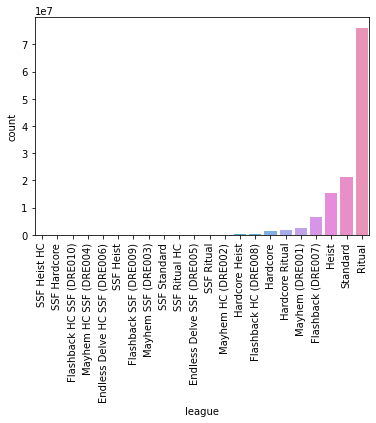

In [6]:
sns.barplot(x="league", y="count", data=public_leagues)
plt.xticks(rotation=90)
plt.show()

Let's also remove SSF leagues, because we are only interested in trade leagues.

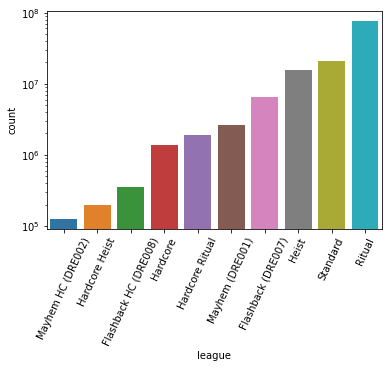

In [7]:
g = sns.barplot(x="league", y="count", data=public_leagues[public_leagues["league"].str.contains("SSF") == False])
g.set(yscale="log")
plt.xticks(rotation=65)
plt.show()

This makes sense, since the Mayhem and Flashback leagues were only one and two weeks long respectively.

Lets take a look at the more fine-grained account-level activity data.

# Dataset 2 - stash_record traffic per league per account name

Here, we have a single .csv for each league from above with the same shape.

Lets take a look at Ritual for now, as its the most recent and probably the most relevant league for future data-mining tasks.

In [3]:
df = pd.read_csv("./datasets/league_stats/league_Ritual.csv")

In [4]:
df["timespan_seconds"] = df.apply(lambda x: (parser.parse(x["max"]) - parser.parse(x["min"])).total_seconds(), axis=1)

In [5]:
df.head()

,account_name,count,min,max,timespan_seconds
0,Hadrancs,34749,2021-01-15 20:14:08.418432,2021-02-02 01:01:48.805364,1.486060e+06
1,冬瓜糖,21914,2021-01-15 20:30:48.340299,2021-02-02 05:02:53.911036,1.499526e+06
2,도비도스,21623,2021-01-15 21:19:55.27413,2021-02-01 23:51:54.262369,1.477919e+06
3,mikeclayton,20369,2021-01-15 23:03:16.463954,2021-02-02 22:33:46.922862,1.553430e+06
4,Mouzpad,18150,2021-01-15 22:02:43.063804,2021-02-02 22:31:36.539048,1.556933e+06


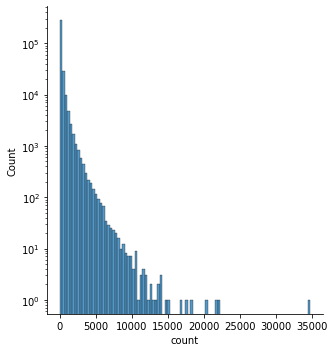

In [6]:
g = sns.displot(df["count"], bins=100)
g.set(yscale="log")
plt.show()

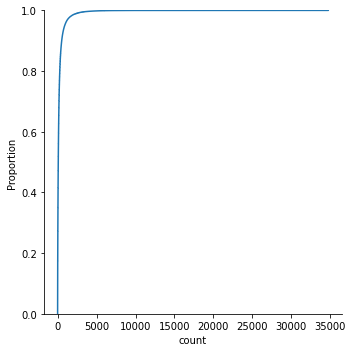

In [7]:
sns.displot(df, x="count", kind="ecdf",)

As expected, a very large proportion of players triggered only few stash_record recordings during indexing. Lets take a look at tabular statistics.

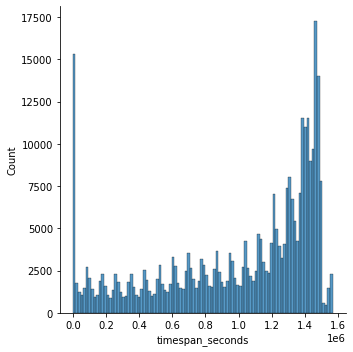

In [16]:
g = sns.displot(df["timespan_seconds"], bins=100)
#g.set(yscale="log")
plt.show()

# analysis


In [12]:
df.describe(percentiles=[0.1, 0.9, 0.95, 0.999])

,count,timespan_seconds
count,331283.000000,3.312830e+05
mean,229.708382,9.951637e+05
std,511.099522,4.714554e+05
min,1.000000,0.000000e+00
10%,7.000000,1.874010e+05
50%,84.000000,1.173474e+06
90%,526.000000,1.467366e+06
95%,908.000000,1.483030e+06
99.9%,5769.872000,1.562535e+06
max,34749.000000,1.566809e+06


<AxesSubplot:xlabel='count', ylabel='timespan_seconds'>

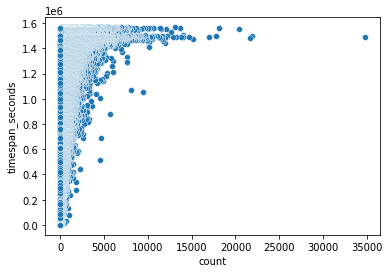

In [20]:
sns.scatterplot(data=df, x="count", y="timespan_seconds")

# analysis